In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats.stats import pearsonr

/var/folders/7t/860dclk54774ltwycrvfp7nc0000gn/T/ipykernel_5144/891266682.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/var/folders/7t/860dclk54774ltwycrvfp7nc0000gn/T/ipykernel_5144/891266682.py:8: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [3]:
df = pd.read_csv('../dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.set_index('customerID', inplace=True)

In [14]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [22]:
# possible values for each feature

possible_values = {
    "gender": ["Female","Male"],
    "SeniorCitizen": [0, 1],
    "Partner": ["No", "Yes"],
    "Dependents": ["No", "Yes"],
    "tenure": [i for i in range(0, 74)],
    "PhoneService": ["No", "Yes"],
    "MultipleLines": ["No phone service", "No", "Yes"],
    "InternetService": ["DSL", "Fiber optic", "No"],
    "OnlineSecurity": ["No", "Yes", "No internet service"],
    "OnlineBackup": ["No", "Yes", "No internet service"],
    "DeviceProtection": ["No", "Yes", "No internet service"],
    "TechSupport": ["No", "Yes", "No internet service"],
    "StreamingTV": ["No", "Yes", "No internet service"],
    "StreamingMovies": ["No", "Yes", "No internet service"],
    "Contract": ["Month-to-month", "One year", "Two year"],
    "PaperlessBilling": ["No", "Yes"],
    "PaymentMethod": ["Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)"],
    "Churn": ["No", "Yes"],
}

In [25]:
# check if all values are in the possible values
def check_values(df, possible_values):
    for column in df.columns:
        if column in possible_values:
            values = df[column].unique()
            if not set(values).issubset(set(possible_values[column])):
                print(f"Column {column} has values {values} that are not in {possible_values[column]}")
    print("End of check")
check_values(df, possible_values)

End of check


In [26]:
# make binary values boolean values
def make_binary_values(df, possible_values):
    for column in df.columns:
        if column in possible_values:
            if set(possible_values[column]) == {0, 1}:
                df[column] = df[column].astype(bool)
            elif set(possible_values[column]) == {"No", "Yes"}:
                df[column] = df[column].map({"No": False, "Yes": True})
            elif set(possible_values[column]) == {"Female", "Male"}:
                df[column] = df[column].map({"Female": False, "Male": True})
    return df

In [49]:
df_new = df.copy()
df_new = make_binary_values(df_new, possible_values)

In [53]:
# look at entry 4472-LVYGI
df_new.loc['4367-NUYAO']

gender                             True
SeniorCitizen                     False
Partner                            True
Dependents                         True
tenure                                0
PhoneService                       True
MultipleLines                       Yes
InternetService                      No
OnlineSecurity      No internet service
OnlineBackup        No internet service
DeviceProtection    No internet service
TechSupport         No internet service
StreamingTV         No internet service
StreamingMovies     No internet service
Contract                       Two year
PaperlessBilling                  False
PaymentMethod              Mailed check
MonthlyCharges                    25.75
TotalCharges                           
Churn                             False
Name: 4367-NUYAO, dtype: object

In [54]:
# rename gender column with IsMale
df_new['IsMale'] = df_new['gender']
df_new.drop(['gender'], axis=1, inplace=True)


In [55]:
#convert TotalCharges to numeric
df_new['TotalCharges'] = pd.to_numeric(df_new['TotalCharges'], errors='coerce')

In [56]:
df_new['TotalCharges'].isnull().sum()

11

In [48]:
# show the rows with null values
df_new[df_new['TotalCharges'].isnull()]


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,IsMale
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,False,True,True,0,False,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,True,Bank transfer (automatic),52.55,NaN,False,False
3115-CZMZD,False,False,True,0,True,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,20.25,NaN,False,True
5709-LVOEQ,False,True,True,0,True,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,False,Mailed check,80.85,NaN,False,False
4367-NUYAO,False,True,True,0,True,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,25.75,NaN,False,True
1371-DWPAZ,False,True,True,0,False,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,False,Credit card (automatic),56.05,NaN,False,False
7644-OMVMY,False,True,True,0,True,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,19.85,NaN,False,True
3213-VVOLG,False,True,True,0,True,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,25.35,NaN,False,True
2520-SGTTA,False,True,True,0,True,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,20.00,NaN,False,False
2923-ARZLG,False,True,True,0,True,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,True,Mailed check,19.70,NaN,False,True


In [57]:
# drop the rows with null values
df_new.dropna(subset=['TotalCharges'], inplace=True)
df_new['TotalCharges'].isnull().sum()

0

In [59]:
df_new

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,IsMale
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,False,True,False,1,False,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,True,Electronic check,29.85,29.85,False,False
5575-GNVDE,False,False,False,34,True,No,DSL,Yes,No,Yes,No,No,No,One year,False,Mailed check,56.95,1889.50,False,True
3668-QPYBK,False,False,False,2,True,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,True,Mailed check,53.85,108.15,True,True
7795-CFOCW,False,False,False,45,False,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,False,Bank transfer (automatic),42.30,1840.75,False,True
9237-HQITU,False,False,False,2,True,No,Fiber optic,No,No,No,No,No,No,Month-to-month,True,Electronic check,70.70,151.65,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,False,True,True,24,True,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,True,Mailed check,84.80,1990.50,False,True
2234-XADUH,False,True,True,72,True,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,True,Credit card (automatic),103.20,7362.90,False,False
4801-JZAZL,False,True,True,11,False,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,True,Electronic check,29.60,346.45,False,False


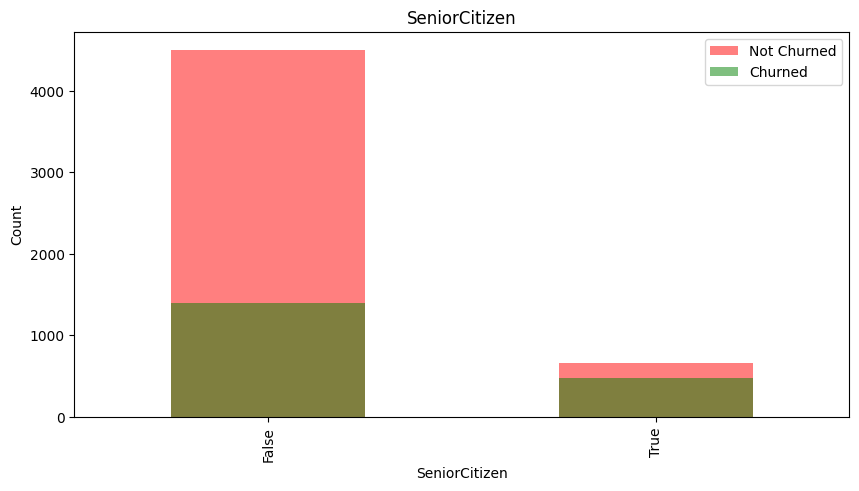

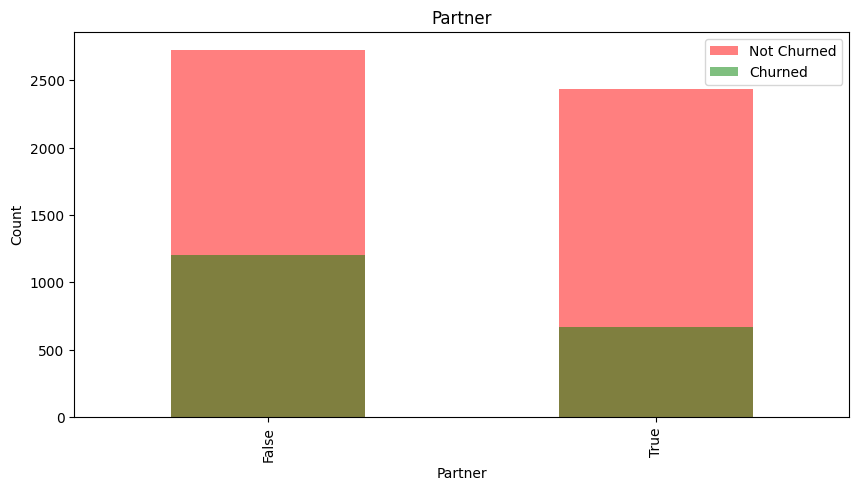

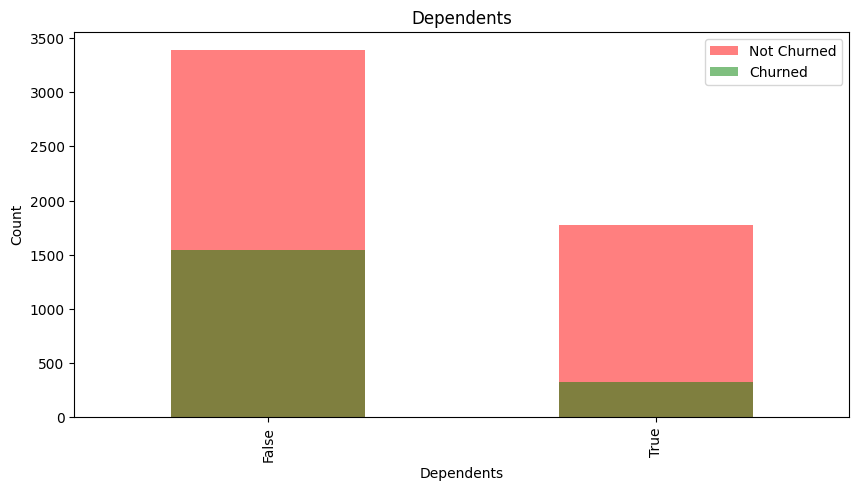

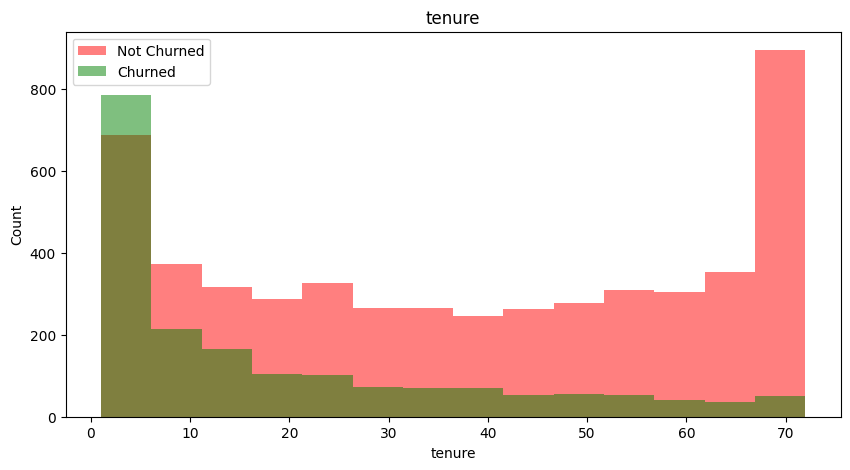

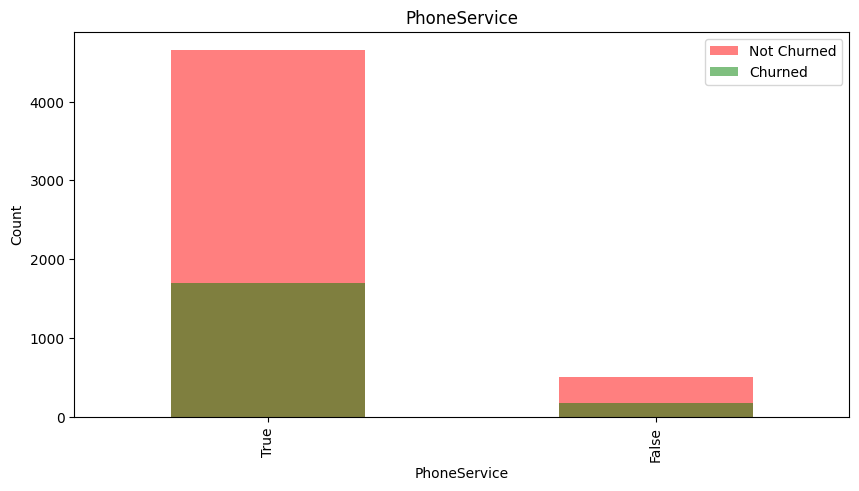

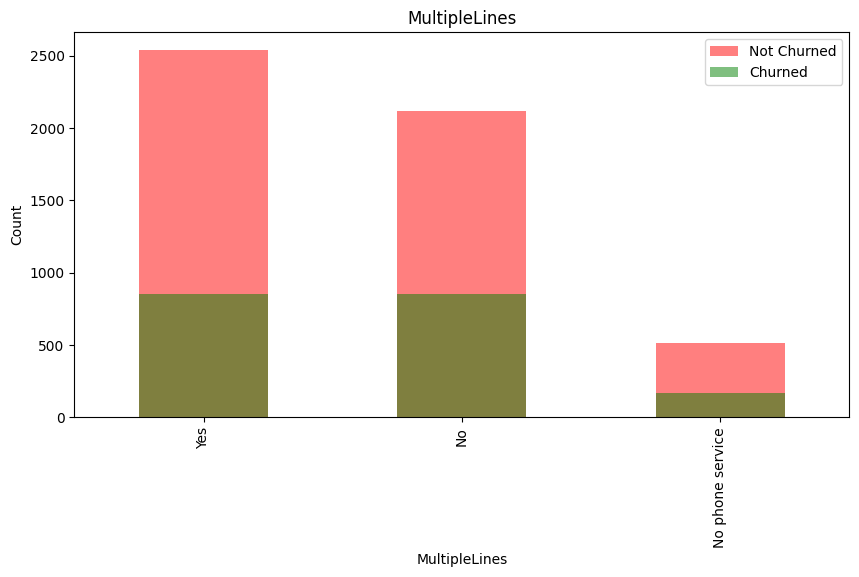

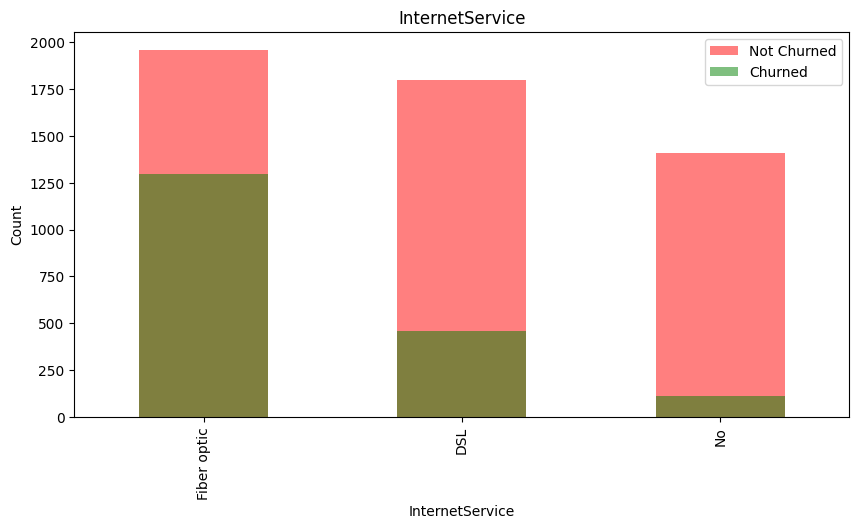

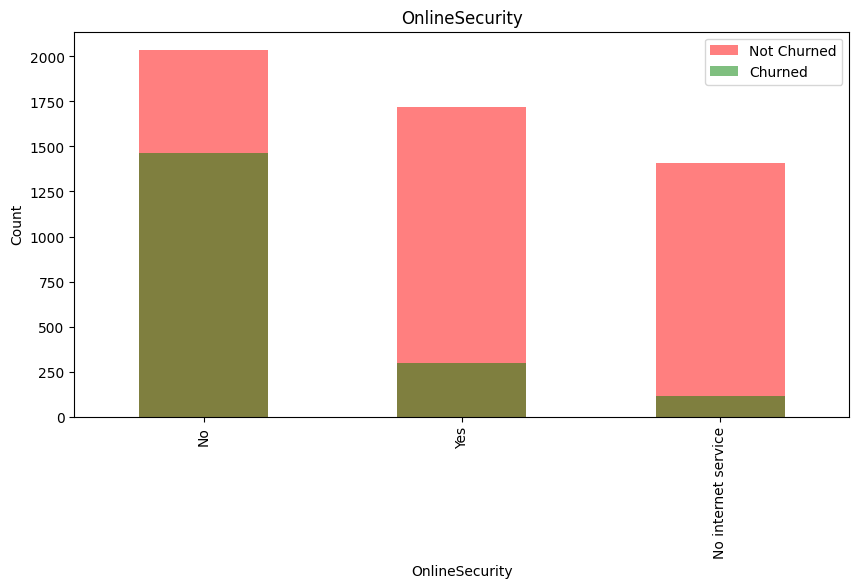

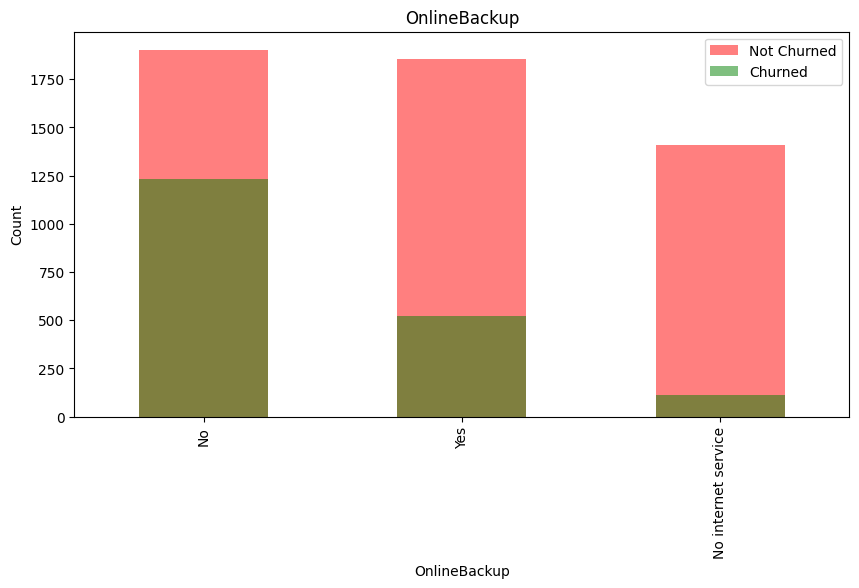

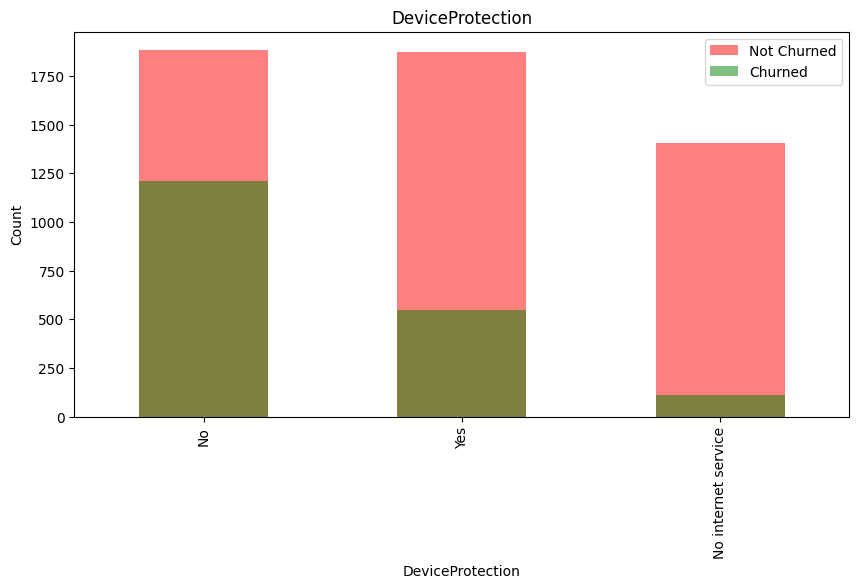

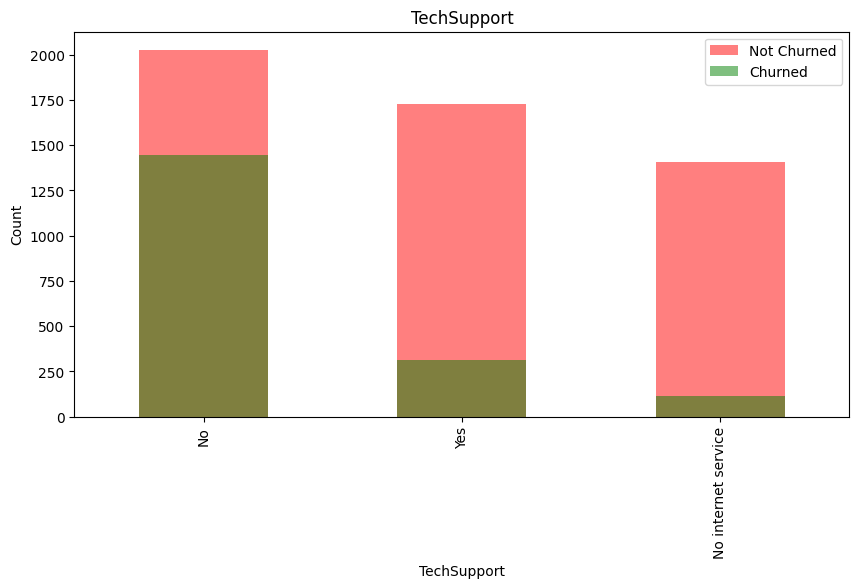

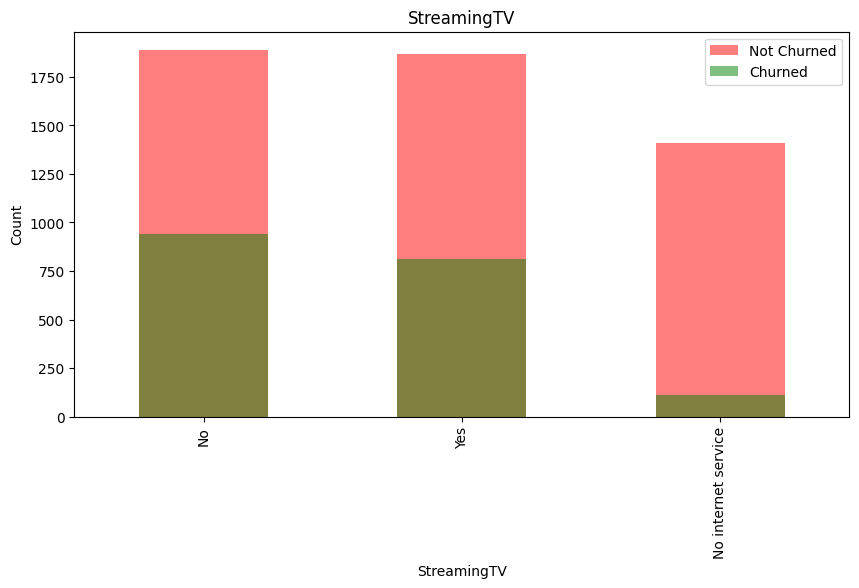

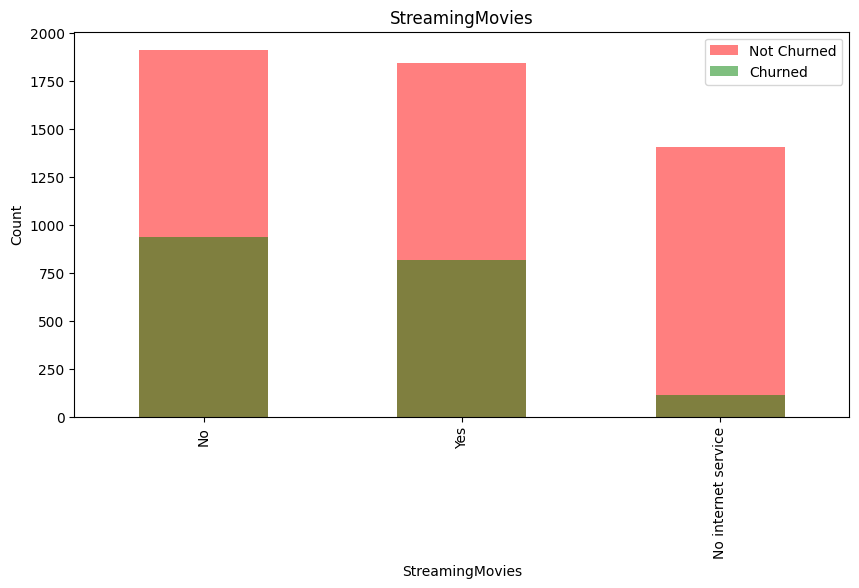

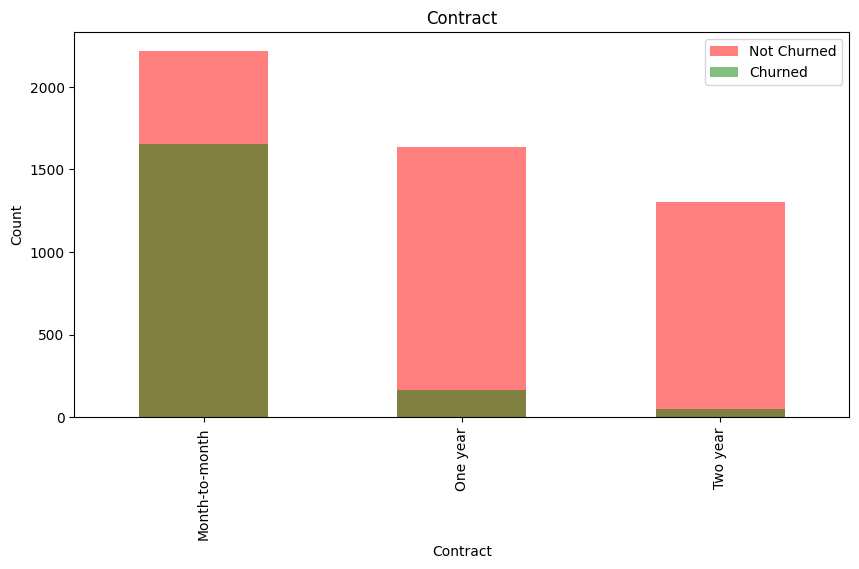

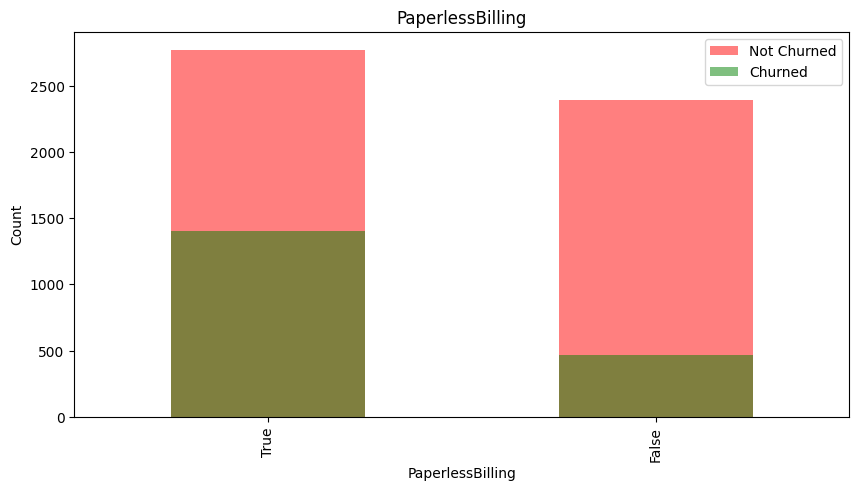

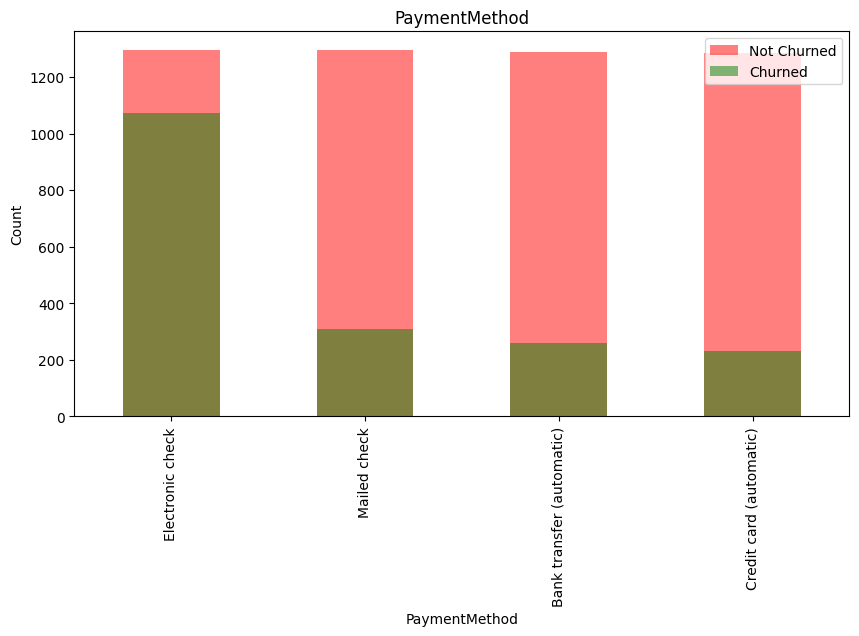

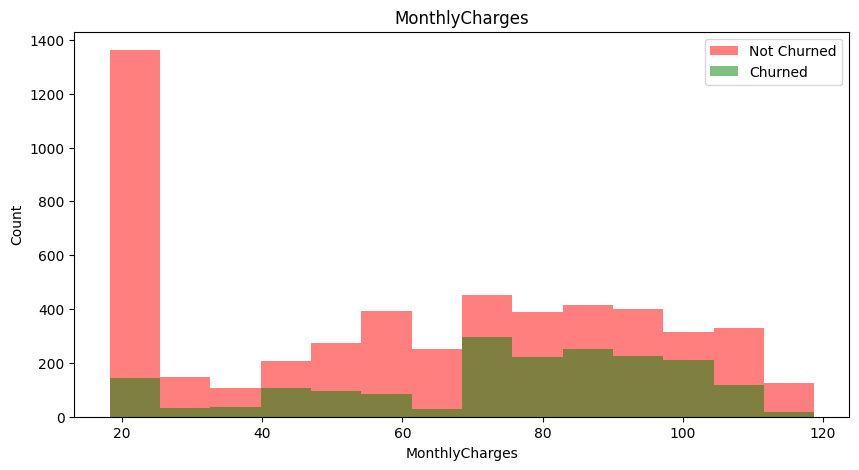

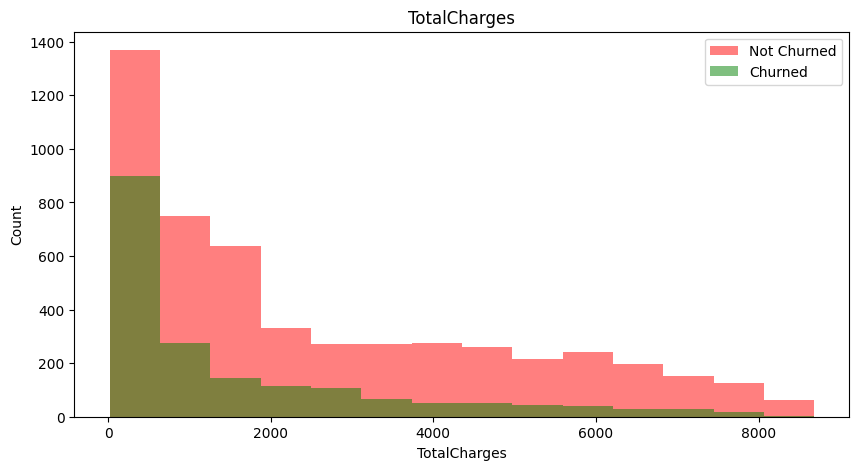

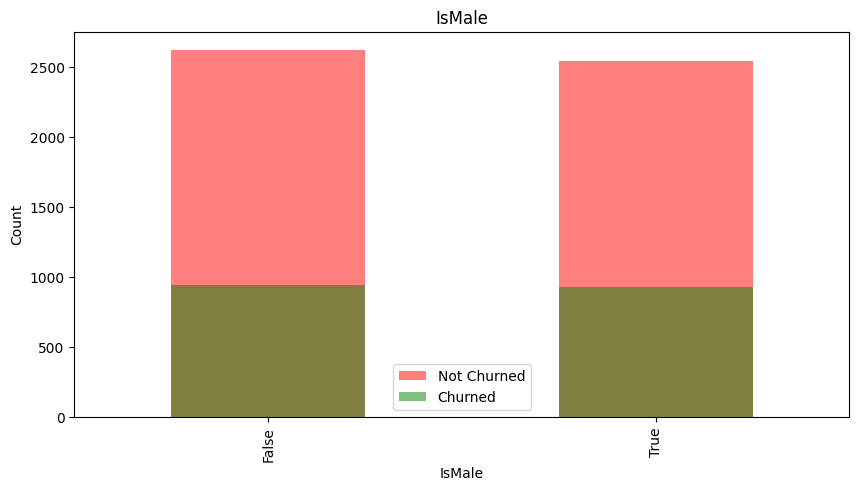

In [60]:
# churned customers
df_churned = df_new[df_new['Churn'] == True]
# not churned customers
df_not_churned = df_new[df_new['Churn'] == False]

#make histogram of all numerical features color coded by churn
def make_histogram(df_churn, df_not_churned, column):
    plt.figure(figsize=(10, 5))
    # same bins for both histograms
    bins = np.linspace(min(df_churn[column].min(), df_not_churned[column].min()),
                       max(df_churn[column].max(), df_not_churned[column].max()), 15)
    plt.hist(df_not_churned[column], bins=bins, color='red', alpha=0.5, label='Not Churned')
    plt.hist(df_churn[column], bins=bins, color='green', alpha=0.5, label='Churned')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

#make bar plot of all categorical features color coded by churn
def make_bar_plot(df_churn, df_not_churned, column):
    plt.figure(figsize=(10, 5))
    df_not_churned[column].value_counts().plot(kind='bar', color='red', alpha=0.5, label='Not Churned')
    df_churn[column].value_counts().plot(kind='bar', color='green', alpha=0.5, label='Churned')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend()
    plt.show()
def make_plots(df_churn, df_not_churned):
    for column in df_churn.columns:
        #if column is numerical
        if df_churn[column].dtype in ['int64', 'float64']:
            make_histogram(df_churn, df_not_churned, column)
# make bar plots for all categorical features
        elif df_churn[column].dtype == 'object' and column != 'customerID':
            make_bar_plot(df_churn, df_not_churned, column)
        elif df_churn[column].dtype == 'bool' and column != 'Churn':
            make_bar_plot(df_churn, df_not_churned, column)
make_plots(df_churned, df_not_churned)